In [3]:
%pylab inline
from __future__ import division
import scipy as sp
from scipy import stats
from scipy.signal import argrelextrema
from scipy.interpolate import interp1d
import operator as op
from decimal import *
# import mpmath as mp
import pickle
from scipy.stats import binom
import mpld3
mpld3.enable_notebook()

Populating the interactive namespace from numpy and matplotlib


In [160]:
%run ../cow.py

# Loudest Talker with Integral Downlink Blocklength

In [56]:
%%time

threshold = 10**(-9)
endpoint = 2
dfade = [10**(-3), 10**(-10), 10**(-3)]
dSNR = 0.01
# N = 2
start_nodes, end_nodes = 2, 36

# print "Hamming RS"
hsrs_codingscheme = '../data_tables/hs_rs_downlink'
# start_tSNR = 0
# hsrs_lti = np.zeros((end_nodes-start_nodes,))

for N in xrange(35, 1, -1):
    start_tSNR = lti_dct_tSNR[N]
#     hsrs_lti[N-start_nodes] = 1
    hsrs_lti[N-start_nodes] = loudest_talker_integral(N, hsrs_codingscheme, start_tSNR, dfade, dSNR)
    lti_dct_tSNR[N] = hsrs_lti[N-start_nodes] - dSNR
    print N, hsrs_lti[N-start_nodes]
# print ""

35 8.6
34 7.89
33 7.55
32 7.38
31 7.22
30 7.12
29 7.09
28 7.05
27 7.05
26 7.08
25 7.12
24 7.18
23 7.28
22 7.38
21 7.5
20 7.67
19 7.85
18 8.06
17 8.32
16 8.61
15 8.95
14 9.36
13 9.82
12 10.37
11 11.04
10 11.83
9 12.81
8 14.05
7 15.63
6 17.75
5 20.83
4

<string>:119: RuntimeWarning: divide by zero encountered in log10
<string>:123: RuntimeWarning: divide by zero encountered in log10
<string>:159: RuntimeWarning: divide by zero encountered in log10
<string>:164: RuntimeWarning: divide by zero encountered in log10
<string>:127: RuntimeWarning: divide by zero encountered in log10


 25.67
3 31.21
2 45.04
CPU times: user 2min 13s, sys: 9.03 s, total: 2min 22s
Wall time: 1min 32s


<string>:170: RuntimeWarning: divide by zero encountered in log10


In [54]:
# lti_dct_tSNR = {}
print lti_dct_tSNR
# for N_tSNR in hsrs_lti:
#     lti_dct_tSNR = 

{2: 45.0, 3: 31.200000000000003, 4: 25.600000000000009, 5: 20.800000000000011, 6: 17.70000000000001, 7: 15.599999999999998, 8: 14.0, 9: 12.799999999999997, 10: 11.799999999999997, 11: 11.0, 12: 10.299999999999999, 13: 9.7999999999999972, 14: 9.2999999999999989, 15: 8.8999999999999968, 16: 8.5999999999999979, 17: 8.2999999999999989, 18: 8.0, 19: 7.7999999999999972, 20: 7.5999999999999979, 21: 7.3999999999999986, 22: 7.2999999999999989, 23: 7.1999999999999993, 24: 7.0999999999999996, 25: 7.0999999999999996, 26: 7.0, 27: 7.0, 28: 7.0, 29: 7.0, 30: 7.0999999999999996, 31: 7.1999999999999993, 32: 7.2999999999999989, 33: 7.4999999999999982, 34: 7.7999999999999972, 35: 8.4999999999999982}


# Loudest Talker No Integral Downlink Blocklength

In [53]:
%%time
dSNR = 0.01
target = 10**(-9)
paddratio = 0.1 # padd = 10**(-10)
start_SNR = 0
start_nodes, end_nodes = 2, 36

hsrsscheme = '../data_tables/hs_rs_downlink'
hsrs_down = loudest_talker(hsrsscheme, dSNR, target, paddratio, start_SNR, start_nodes, end_nodes)
print hsrs_down

[ 46.93  32.97  25.88  21.57  18.66  16.58  15.02  13.8   12.83  12.05
  11.38  10.84  10.39   9.99   9.67   9.4    9.14   8.95   8.79   8.64
   8.54   8.47   8.39   8.37   8.38   8.37   8.44   8.54   8.65   8.86
   9.14   9.51  10.21  11.87]
CPU times: user 4.36 s, sys: 61.2 ms, total: 4.42 s
Wall time: 4.5 s


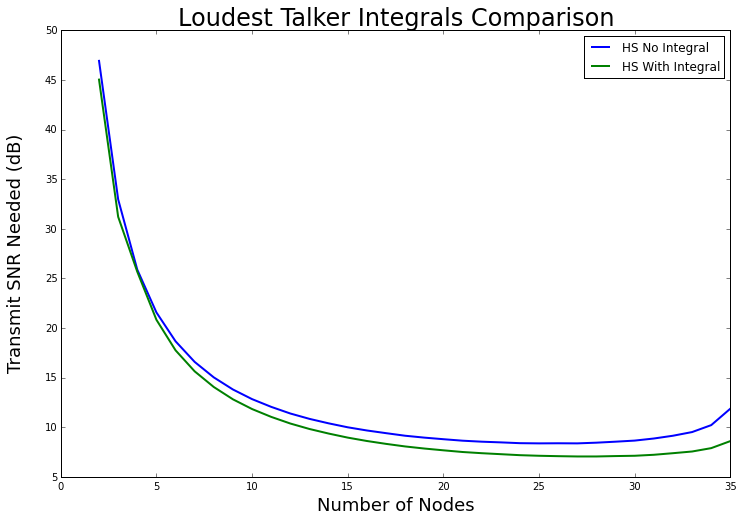

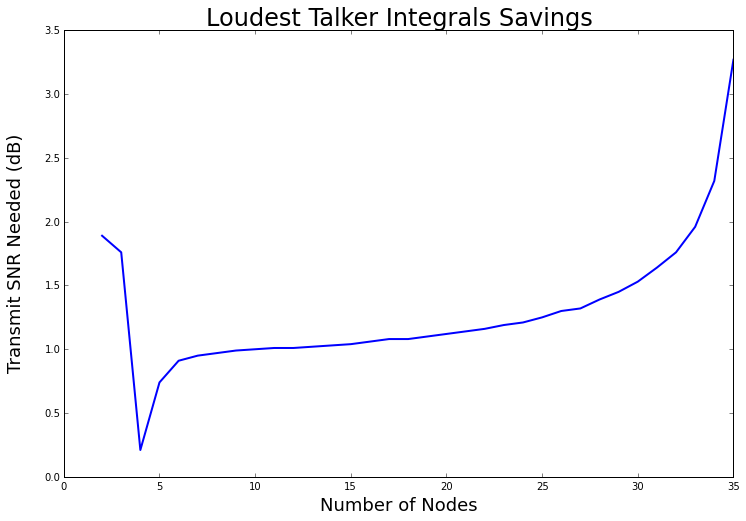

In [60]:
user_range = range(start_nodes, end_nodes)

figure(figsize=(12, 8))
plot(user_range, hsrs_down, lw=2.0, label='HS No Integral')
plot(user_range, hsrs_lti, lw=2.0, label='HS With Integral')
legend(loc=0)
xlabel('Number of Nodes', fontsize=18)
ylabel('Transmit SNR Needed (dB)', fontsize=18, labelpad=20)
title('Loudest Talker Integrals Comparison', fontsize=24)
savefig('loudest_integral_comparison.pdf', bbox='tight')

figure(figsize=(12, 8))
plot(user_range, hsrs_down-hsrs_lti, lw=2.0, label='HS No Integral')
# legend(loc=0)
xlabel('Number of Nodes', fontsize=18)
ylabel('Transmit SNR Needed (dB)', fontsize=18, labelpad=20)
title('Loudest Talker Integrals Savings', fontsize=24)
savefig('loudest_integral_savings.pdf', bbox='tight')

In [61]:
print hsrs_down-hsrs_lti

print {"lti": hsrs_lti}

[ 1.89  1.76  0.21  0.74  0.91  0.95  0.97  0.99  1.    1.01  1.01  1.02
  1.03  1.04  1.06  1.08  1.08  1.1   1.12  1.14  1.16  1.19  1.21  1.25
  1.3   1.32  1.39  1.45  1.53  1.64  1.76  1.96  2.32  3.27]
{'lti': array([ 45.04,  31.21,  25.67,  20.83,  17.75,  15.63,  14.05,  12.81,
        11.83,  11.04,  10.37,   9.82,   9.36,   8.95,   8.61,   8.32,
         8.06,   7.85,   7.67,   7.5 ,   7.38,   7.28,   7.18,   7.12,
         7.08,   7.05,   7.05,   7.09,   7.12,   7.22,   7.38,   7.55,
         7.89,   8.6 ])}


# Loudest Talker No Integral Uplink Blocklength

In [62]:
%%time
dSNR = 0.01
target = 10**(-9)
paddratio = 0.1 # padd = 10**(-10)
start_SNR = 0
start_nodes, end_nodes = 2, 36

hsrsscheme = '../data_tables/hs_rs_uplink'
hsrs_up = loudest_talker(hsrsscheme, dSNR, target, paddratio, start_SNR, start_nodes, end_nodes)
print hsrs_up

[ 47.33  33.68  26.86  22.77  20.07  18.11  16.79  15.69  14.95  14.3
  13.84  13.32  12.95  12.95  12.44  12.37  12.35  12.47  12.12  12.39
  12.11  12.58  12.35  13.12  12.92  12.73  14.02  13.86  13.71  16.26
  16.14  16.06  15.99  15.93]
CPU times: user 5.18 s, sys: 102 ms, total: 5.28 s
Wall time: 5.65 s


# Loudest Talker With Integral Uplink Blocklength

In [161]:
%%time

threshold = 10**(-9)
endpoint = 2
dfade = [10**(-3), 10**(-10), 10**(-3)]
dSNR = 0.01
# N = 2
start_nodes, end_nodes = 2, 36

hsrs_codingscheme = '../data_tables/hs_rs_uplink'
hsrs_lti_up = np.zeros((end_nodes-start_nodes,))

lti_dct_tSNR_up = {}
for N in xrange(35, 1, -1):
    lti_dct_tSNR_up[N] = 0

for dSNR in [10**i for i in range(0, -3, -1)]:
    for N in xrange(35, 1, -1):
        start_tSNR = lti_dct_tSNR_up[N]
        hsrs_lti_up[N-start_nodes] = loudest_talker_integral(N, hsrs_codingscheme, start_tSNR, dfade, dSNR)
        lti_dct_tSNR_up[N] = hsrs_lti_up[N-start_nodes] - dSNR
        if N % 10 == 0:
            print N, hsrs_lti_up[N-start_nodes]


30 8.0
20 8.0
10

<string>:119: RuntimeWarning: divide by zero encountered in log10
<string>:123: RuntimeWarning: divide by zero encountered in log10
<string>:161: RuntimeWarning: divide by zero encountered in log10
<string>:166: RuntimeWarning: divide by zero encountered in log10
<string>:127: RuntimeWarning: divide by zero encountered in log10


 12.0
30 7.6
20 7.8
10 12.0
30 7.6
20 7.74
10 11.96
CPU times: user 7min 30s, sys: 35.3 s, total: 8min 5s
Wall time: 4min 55s


<string>:172: RuntimeWarning: divide by zero encountered in log10


In [162]:
# lti_dct_tSNR_up = {}
print lti_dct_tSNR_up
print hsrs_lti_up

{2: 45.900000000000013, 3: 31.43000000000001, 4: 25.670000000000019, 5: 20.810000000000013, 6: 17.810000000000013, 7: 15.639999999999997, 8: 14.119999999999999, 9: 12.849999999999996, 10: 11.949999999999996, 11: 11.159999999999998, 12: 10.529999999999998, 13: 9.8999999999999968, 14: 9.4199999999999982, 15: 9.1999999999999993, 16: 8.6199999999999974, 17: 8.4199999999999982, 18: 8.2199999999999989, 19: 8.1599999999999984, 20: 7.7299999999999969, 21: 7.769999999999996, 22: 7.4499999999999975, 23: 7.6099999999999977, 24: 7.3299999999999983, 25: 7.7299999999999969, 26: 7.4799999999999969, 27: 7.2499999999999982, 28: 7.9699999999999953, 29: 7.7799999999999958, 30: 7.5899999999999963, 31: 9.2999999999999989, 32: 9.1599999999999984, 33: 9.0699999999999985, 34: 8.9799999999999951, 35: 8.8599999999999959}
[ 45.91  31.44  25.68  20.82  17.82  15.65  14.13  12.86  11.96  11.17
  10.54   9.91   9.43   9.21   8.63   8.43   8.23   8.17   7.74   7.78
   7.46   7.62   7.34   7.74   7.49   7.26   7.98  

In [70]:
# [ 35.    13.59   4.91  10.91]
# [ 34.    13.72   4.98  10.92]
# [ 33.    13.84   4.98  10.92]
# [ 32.    13.97   4.96  10.92]
# [ 31.    14.9    3.99  10.93]
# [ 30.    11.87   3.63   8.27]
# [ 29.    12.45   2.99   8.29]
# [ 28.    12.74   2.99   8.31]
# [ 27.    11.13   2.94   6.87]
# [ 26.    11.34   2.99   6.89]
# [ 25.    11.57   2.98   6.91]
# [ 24.    10.92   2.41   5.95]
# [ 23.    11.52   1.99   5.97]
# [ 22.    10.83   1.97   5.28]
# [ 21.    11.15   1.99   5.31]
# [ 20.    10.9    1.81   4.77]
# [ 19.    11.28   1.94   4.83]
# [ 18.    11.22   1.68   4.39]
# [ 17.    11.94   0.99   4.05]
# [ 16.    11.64   0.99   3.73]
# [ 15.    11.94   1.43   3.8 ]
# [ 14.    12.07   0.99   3.3 ]
# [ 13.    12.43   0.99   3.11]
# [ 12.    12.98   0.98   2.98]
# [ 11.    13.48   0.87   2.68]
# [ 10.    14.18   0.72   2.44]
# [  9.    14.97   0.53   2.11]
# [  8.    16.12   0.5    1.9 ]
# [  7.    17.5    0.28   1.55]
# [  6.00000000e+00   1.98100000e+01  -1.00000000e-02   1.33000000e+00]
# [  5.00000000e+00   2.23200000e+01  -1.00000000e-02   1.03000000e+00]
# [  4.    26.43  -0.07   0.71]
# [  3.    33.25  -0.25   0.34]
# [  2.    46.33  -0.38  -0.06]

hsrs_fade_gap = [13.59, 13.72, 13.84, 13.97, 14.9, 11.87, 12.45, 12.74, 11.13, 11.34, 11.57, 10.92, 11.52, 10.83, 11.15, 10.9, 11.28, 11.22, 11.94,
                         11.64, 11.94, 12.07, 12.43, 12.98, 13.48, 14.18, 14.97, 16.12, 17.5, 19.81, 22.32, 26.43, 33.25, 46.33]
hsrs_fade_gap.reverse()
hsrs_fade_gap = np.array(hsrs_fade_gap)
print hsrs_fade_gap

[ 46.33  33.25  26.43  22.32  19.81  17.5   16.12  14.97  14.18  13.48
  12.98  12.43  12.07  11.94  11.64  11.94  11.22  11.28  10.9   11.15
  10.83  11.52  10.92  11.57  11.34  11.13  12.74  12.45  11.87  14.9
  13.97  13.84  13.72  13.59]


In [75]:
%run ../optimize_3_dct.py
opt_3_tSNR = tSNR_start.values()
opt_3_rSNRdu = rSNRdu_start.values()
opt_3_rSNR3 = rSNR3_start.values()

print opt_3_tSNR
print '\n'
print opt_3_rSNRdu
print '\n'
print opt_3_rSNR3

[47.1, 33.44, 26.61, 22.51, 19.78, 17.79, 16.42, 15.26, 14.47, 13.77, 13.25, 12.69, 12.27, 12.19, 11.65, 11.53, 11.45, 11.5, 11.11, 11.31, 11.01, 11.38, 11.12, 11.77, 11.54, 11.32, 12.43, 12.24, 12.06, 14.31, 14.15, 14.03, 13.92, 13.85]


[-0.33, -0.17, 0.0, 0.14, 0.28, 0.36, 0.54, 0.62, 0.82, 0.94, 1.09, 1.12, 1.21, 1.52, 1.39, 1.6, 1.78, 2.06, 1.93, 2.26, 2.19, 2.56, 2.53, 3.13, 3.06, 2.98, 3.85, 3.79, 3.71, 5.26, 5.28, 5.25, 5.42, 5.45]


[-0.33, 0.15, 0.57, 0.93, 1.26, 1.5, 1.87, 2.1, 2.44, 2.7, 3.0, 3.15, 3.35, 3.85, 3.79, 4.12, 4.46, 4.91, 4.86, 5.4, 5.38, 6.08, 6.06, 7.03, 7.01, 6.99, 8.43, 8.42, 8.39, 11.04, 11.04, 11.05, 11.07, 11.05]


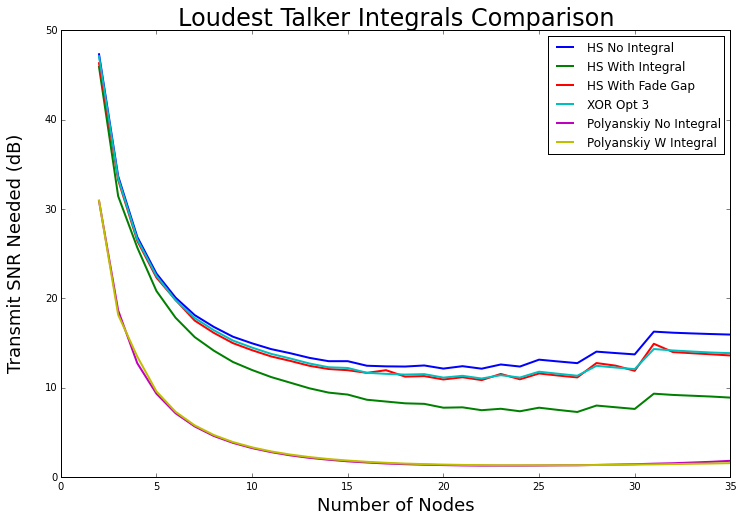

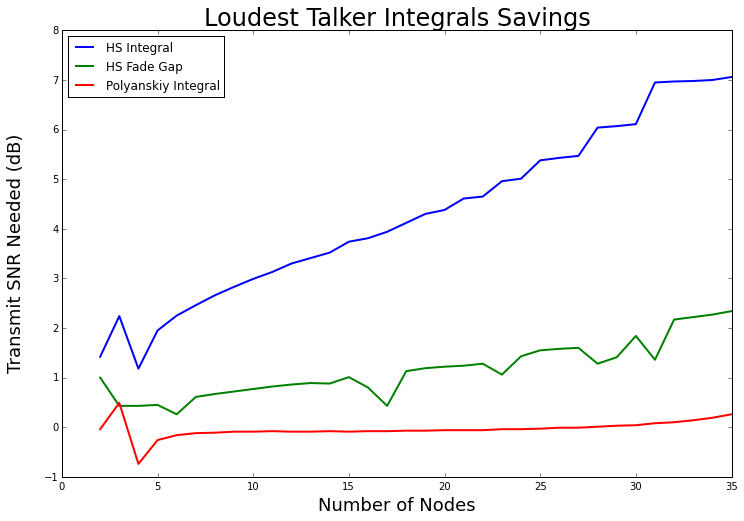

In [167]:
user_range = range(start_nodes, end_nodes)

figure(figsize=(12, 8))
plot(user_range, hsrs_up, lw=2.0, label='HS No Integral')
plot(user_range, hsrs_lti_up, lw=2.0, label='HS With Integral')
plot(user_range, hsrs_fade_gap, lw=2.0, label='HS With Fade Gap')
plot(user_range, opt_3_tSNR, lw=2.0, label='XOR Opt 3')
plot(user_range, polyup_lt, lw=2.0, label='Polyanskiy No Integral')
plot(user_range, polyup_lti, lw=2.0, label='Polyanskiy W Integral')
legend(loc=0)
xlabel('Number of Nodes', fontsize=18)
ylabel('Transmit SNR Needed (dB)', fontsize=18, labelpad=20)
title('Loudest Talker Integrals Comparison', fontsize=24)
savefig('loudest_integral_comparison_up.pdf', bbox='tight')

figure(figsize=(12, 8))
plot(user_range, hsrs_up-hsrs_lti_up, lw=2.0, label='HS Integral')
plot(user_range, hsrs_up-hsrs_fade_gap, lw=2.0, label='HS Fade Gap')
plot(user_range, polyup_lt-polyup_lti, lw=2.0, label='Polyanskiy Integral')
legend(loc=0)
xlabel('Number of Nodes', fontsize=18)
ylabel('Transmit SNR Needed (dB)', fontsize=18, labelpad=20)
title('Loudest Talker Integrals Savings', fontsize=24)
savefig('loudest_integral_savings_up.pdf', bbox='tight')

# Polyanskiy

In [165]:
%%time
dSNR = 0.01
target = 10**(-9)
paddratio = 0.1 # padd = 10**(-10)
start_SNR = 0
start_nodes, end_nodes = 2, 36

poly_scheme = '../data_tables/polyanskiy_up'
polyup_lt = loudest_talker(shannon_scheme, dSNR, target, paddratio, start_SNR, start_nodes, end_nodes)
print polyup_lt

[ 30.9   18.64  12.72   9.31   7.12   5.64   4.57   3.8    3.21   2.76
   2.4    2.12   1.91   1.73   1.6    1.49   1.41   1.35   1.31   1.27
   1.25   1.25   1.25   1.26   1.28   1.29   1.33   1.37   1.41   1.47
   1.52   1.6    1.68   1.79]
CPU times: user 785 ms, sys: 33.9 ms, total: 819 ms
Wall time: 893 ms


In [166]:
%%time
threshold = 10**(-9)
endpoint = 2
dfade = [10**(-3), 10**(-10), 10**(-3)]
start_nodes, end_nodes = 2, 36

polyup_scheme = '../data_tables/polyanskiy_up'
polyup_lti = np.zeros((end_nodes-start_nodes,))

polyup_lti_dct = {N:0 for N in xrange(2, 36, 1)}

for dSNR in [10**i for i in range(0, -3, -1)]:
    for N in xrange(35, 1, -1):
        start_tSNR = polyup_lti_dct[N]
        polyup_lti[N-start_nodes] = loudest_talker_integral(N, polyup_scheme, start_tSNR, dfade, dSNR)
        polyup_lti_dct[N] = polyup_lti[N-start_nodes] - dSNR
        if N % 10 == 0:
            print N, polyup_lti[N-start_nodes]
# print ""

30 2.0
20 2.0
10 4.0
30 1.4
20 1.4
10 3.3
30 1.37
20 1.37
10 3.3
CPU times: user 5min 46s, sys: 36.3 s, total: 6min 22s
Wall time: 4min 7s


In [169]:
print "Polyanskiy No Integral Less Polyanskiy With Integral"
print polyup_lt - polyup_lti

Polyanskiy No Integral Less Polyanskiy With Integral
[-0.04  0.49 -0.74 -0.26 -0.16 -0.12 -0.11 -0.09 -0.09 -0.08 -0.09 -0.09
 -0.08 -0.09 -0.08 -0.08 -0.07 -0.07 -0.06 -0.06 -0.06 -0.04 -0.04 -0.03
 -0.01 -0.01  0.01  0.03  0.04  0.08  0.1   0.14  0.19  0.26]


# Loudest Talker No Integral Shannon

In [77]:
%%time
dSNR = 0.01
target = 10**(-9)
paddratio = 0.1 # padd = 10**(-10)
start_SNR = 0
start_nodes, end_nodes = 2, 36

shannon_scheme = '../data_tables/shannon_tables'
shannon_lt = loudest_talker(shannon_scheme, dSNR, target, paddratio, start_SNR, start_nodes, end_nodes)
print shannon_lt

[ 30.9   18.64  12.72   9.31   7.12   5.64   4.57   3.8    3.21   2.76
   2.4    2.12   1.91   1.73   1.6    1.49   1.41   1.35   1.31   1.27
   1.25   1.25   1.25   1.26   1.28   1.29   1.33   1.37   1.41   1.47
   1.52   1.6    1.68   1.79]
CPU times: user 795 ms, sys: 33.4 ms, total: 829 ms
Wall time: 999 ms


In [149]:
%%time

threshold = 10**(-9)
endpoint = 2
dfade = [10**(-3), 10**(-10), 10**(-3)]
# dSNR = 1
# N = 2
start_nodes, end_nodes = 2, 36

shannon_scheme = '../data_tables/shannon_tables'
shannon_lti = np.zeros((end_nodes-start_nodes,))

shannon_lti_dct = {}
for N in xrange(35, 1, -1):
    shannon_lti_dct[N] = 0

for dSNR in [10**i for i in range(0, -3, -1)]:
    for N in xrange(35, 1, -1):
        start_tSNR = shannon_lti_dct[N]
        shannon_lti[N-start_nodes] = loudest_talker_integral(N, shannon_scheme, start_tSNR, dfade, dSNR)
        shannon_lti_dct[N] = shannon_lti[N-start_nodes] - dSNR
        if N % 10 == 0:
            print N, shannon_lti[N-start_nodes]
# print ""

30 2.0
20 2.0
10

<string>:119: RuntimeWarning: divide by zero encountered in log10
<string>:123: RuntimeWarning: divide by zero encountered in log10
<string>:161: RuntimeWarning: divide by zero encountered in log10
<string>:166: RuntimeWarning: divide by zero encountered in log10
<string>:127: RuntimeWarning: divide by zero encountered in log10


 4.0
30 1.2
20 1.2
10 3.3
30 1.14
20 1.2
10 3.22
CPU times: user 5min 49s, sys: 44.5 s, total: 6min 33s
Wall time: 4min 26s


<string>:172: RuntimeWarning: divide by zero encountered in log10


In [150]:
print "Loudest Talker No Integral"
print shannon_lt
print ""
print "Loudest Talker With Integral"
print shannon_lti
print ""
print "Difference"
print shannon_lt - shannon_lti

Loudest Talker No Integral
[ 30.9   18.64  12.72   9.31   7.12   5.64   4.57   3.8    3.21   2.76
   2.4    2.12   1.91   1.73   1.6    1.49   1.41   1.35   1.31   1.27
   1.25   1.25   1.25   1.26   1.28   1.29   1.33   1.37   1.41   1.47
   1.52   1.6    1.68   1.79]

Loudest Talker With Integral
[ 30.9   18.63  13.55   9.78   7.24   5.66   4.63   3.79   3.22   2.75
   2.35   2.09   1.85   1.68   1.53   1.41   1.33   1.26   1.2    1.16
   1.12   1.1    1.1    1.09   1.1    1.09   1.11   1.13   1.14   1.17
   1.19   1.22   1.24   1.28]

Difference
[  2.00373051e-12   1.00000000e-02  -8.30000000e-01  -4.70000000e-01
  -1.20000000e-01  -2.00000000e-02  -6.00000000e-02   1.00000000e-02
  -1.00000000e-02   1.00000000e-02   5.00000000e-02   3.00000000e-02
   6.00000000e-02   5.00000000e-02   7.00000000e-02   8.00000000e-02
   8.00000000e-02   9.00000000e-02   1.10000000e-01   1.10000000e-01
   1.30000000e-01   1.50000000e-01   1.50000000e-01   1.70000000e-01
   1.80000000e-01   2.00000000e

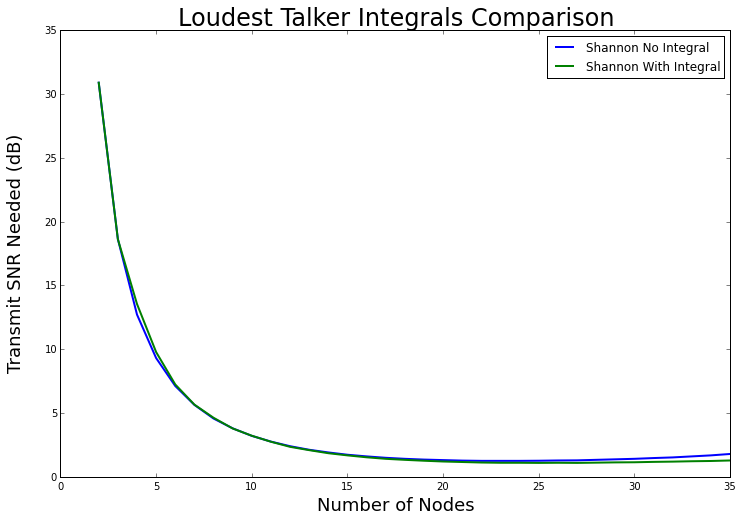

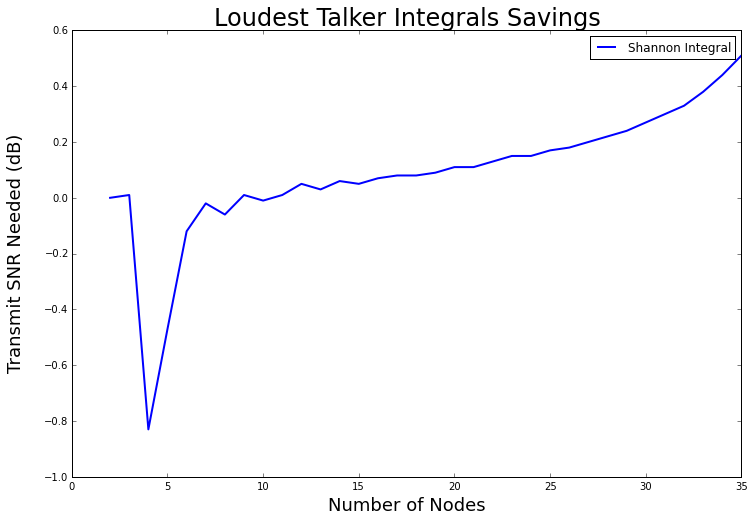

In [151]:
user_range = range(start_nodes, end_nodes)

figure(figsize=(12, 8))
plot(user_range, shannon_lt, lw=2.0, label='Shannon No Integral')
plot(user_range, shannon_lti, lw=2.0, label='Shannon With Integral')
legend(loc=0)
xlabel('Number of Nodes', fontsize=18)
ylabel('Transmit SNR Needed (dB)', fontsize=18, labelpad=20)
title('Loudest Talker Integrals Comparison', fontsize=24)
savefig('shannon_integral_comparison.pdf', bbox='tight')

figure(figsize=(12, 8))
plot(user_range, shannon_lt-shannon_lti, lw=2.0, label='Shannon Integral')
legend(loc=0)
xlabel('Number of Nodes', fontsize=18)
ylabel('Transmit SNR Needed (dB)', fontsize=18, labelpad=20)
title('Loudest Talker Integrals Savings', fontsize=24)
savefig('shannon_integral_savings.pdf', bbox='tight')

# Debugging

In [108]:
%%time
N = 2

shannon_scheme = '../data_tables/shannon_tables'
filename = shannon_scheme + '/n' + str(N) + '.in'
codetable = load_table(filename)

i_range = range(-15, -8)
psingles = []
pprotocols = []

for padd in [10**i for i in i_range]:
    rSNR = codetable[0][np.where(np.array(codetable[1])<=padd)[0][0]]

    tSNR = 30.9
    hcrit = 10**((rSNR - tSNR)/10) # linear fade
    pbadfade = 1 - np.exp(-hcrit)
    psingle = pbadfade + (1-pbadfade)*padd

    pprotocol = sum([nCr(N, a) * (1-psingle)**a * psingle**(N-a) *
                         (1-(1-(pbadfade**a + (1-pbadfade**a) * padd))**(N-a)) for a in range(N)])
    
    psingles.append(psingle)
    pprotocols.append(pprotocol)

CPU times: user 2.69 ms, sys: 4.44 ms, total: 7.13 ms
Wall time: 8.2 ms


In [111]:
print pprotocols
print min(pprotocols)

[9.9794832369747088e-10, 9.9794832468207327e-10, 9.9794833453214642e-10, 9.9794843301668436e-10, 9.9794941787447768e-10, 9.9795926649129008e-10, 9.9805775534031657e-10]
9.97948323697e-10


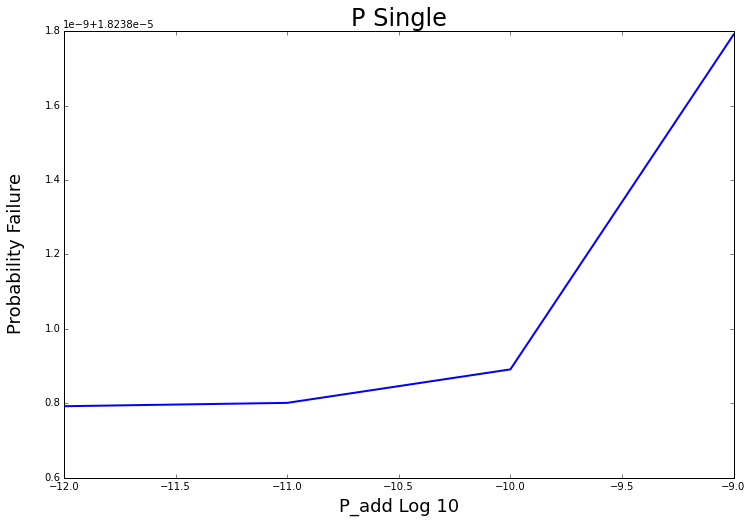

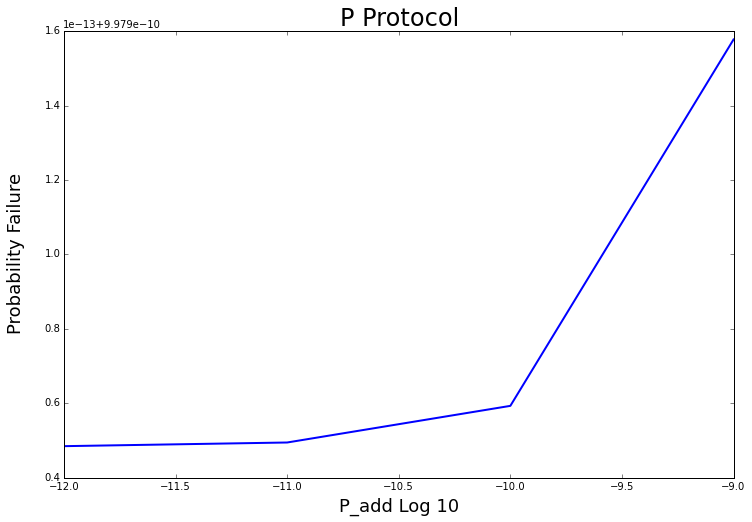

In [107]:
figure(figsize=(12, 8))
plot(i_range, psingles, lw=2.0)
legend(loc=0)
xlabel('P_add Log 10', fontsize=18)
ylabel('Probability Failure', fontsize=18, labelpad=20)
title('P Single', fontsize=24)
# savefig('shannon_integral_savings.pdf', bbox='tight')

figure(figsize=(12, 8))
plot(i_range, pprotocols, lw=2.0)
legend(loc=0)
xlabel('P_add Log 10', fontsize=18)
ylabel('Probability Failure', fontsize=18, labelpad=20)
title('P Protocol', fontsize=24)
# savefig('shannon_integral_savings.pdf', bbox='tight')

In [157]:
%%time
# %run ../cow.py
N = 3

shannon_scheme = '../data_tables/shannon_tables'
filename = shannon_scheme + '/n' + str(N) + '.in'
codetable = load_table(filename)

tablefunc = interp1d(codetable[0], codetable[1], kind='linear', bounds_error=False, fill_value=(1.0, 0.0))
# rSNR2 = codetable[0][np.where(np.array(codetable[1])<=pa2)[0][0]]

tSNR = 18.63

psingle = p_single(tablefunc, tSNR, endpoint, dfade)
print psingle
rv = binom(N, 1-psingle)
a_range = np.arange(0, N, 1)
pmax_array = np.array([p_max(tablefunc, a, tSNR, endpoint, dfade) for a in a_range])
pprotocol = np.dot(rv.pmf(a_range), (1 - (1 - pmax_array)**(N - a_range)))

print (1 - (1 - pmax_array)**(N - a_range))
print rv.pmf(a_range)
print rv.pmf(a_range) * (1 - (1 - pmax_array)**(N - a_range))

print psingle
print pprotocol

<string>:119: RuntimeWarning: divide by zero encountered in log10
<string>:127: RuntimeWarning: divide by zero encountered in log10
<string>:161: RuntimeWarning: divide by zero encountered in log10
<string>:172: RuntimeWarning: divide by zero encountered in log10


0.000463873319945
[  1.00000000e+00   9.27531461e-04   2.15178506e-07]
[  9.98155452e-11   6.45235924e-07   1.39032919e-03]
[  9.98155452e-11   5.98476620e-10   2.99168957e-10]
0.000463873319945
9.97461122024e-10
CPU times: user 3.31 s, sys: 1.24 s, total: 4.56 s
Wall time: 4.55 s
Parser   : 277 ms


In [158]:
%run ../cow.py
z = loudest_talker(shannon_scheme, 0.01, 10**(-9), 0.1, 18.62, 3, 4)

18.63
0.000464407504659
[1.0, 0.0009285993349879007, 2.1577423747753954e-07]
[1.0016077759251668e-10, 6.4672250881831546e-07, 0.001391928768477349]
[1.0016077759251668e-10, 6.0054609161039452e-10, 3.0034236864125067e-10]
18.64
0.000463339644754
[1.0, 0.00092646460588263757, 2.1478353373627357e-07]
[9.9471435191344687e-11, 6.4375246489807327e-07, 0.0013887311309193641]
[9.9471435191344687e-11, 5.9641387367776989e-10, 2.9827657970843258e-10]


[30.900000000000141, 30.900000000000141, 30.900000000000141, 30.900000000000141, 30.900000000000141, 30.900000000000141, 30.900000000000141, 30.900000000000141, 30.900000000000141, 30.900000000000141, 30.900000000000141]


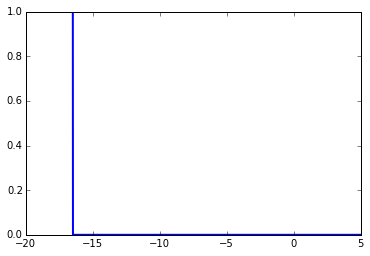

In [133]:
%run ../cow.py
lt_test = []
i_range = np.arange(-100, 1, 10)
for i in 10**i_range:
    z = loudest_talker(shannon_scheme, 0.01, 10**(-9), i, 30, 2, 3)
    lt_test.append(z[0])
print lt_test

# print codetable[1][-1]
plot(codetable[0], codetable[1], lw=2.0)

In [131]:
print 10**(-100)

1e-100
